<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good) Exercises</span></div>

# Exercise 1

In [198]:
import numpy as np
from matplotlib import pyplot as plt

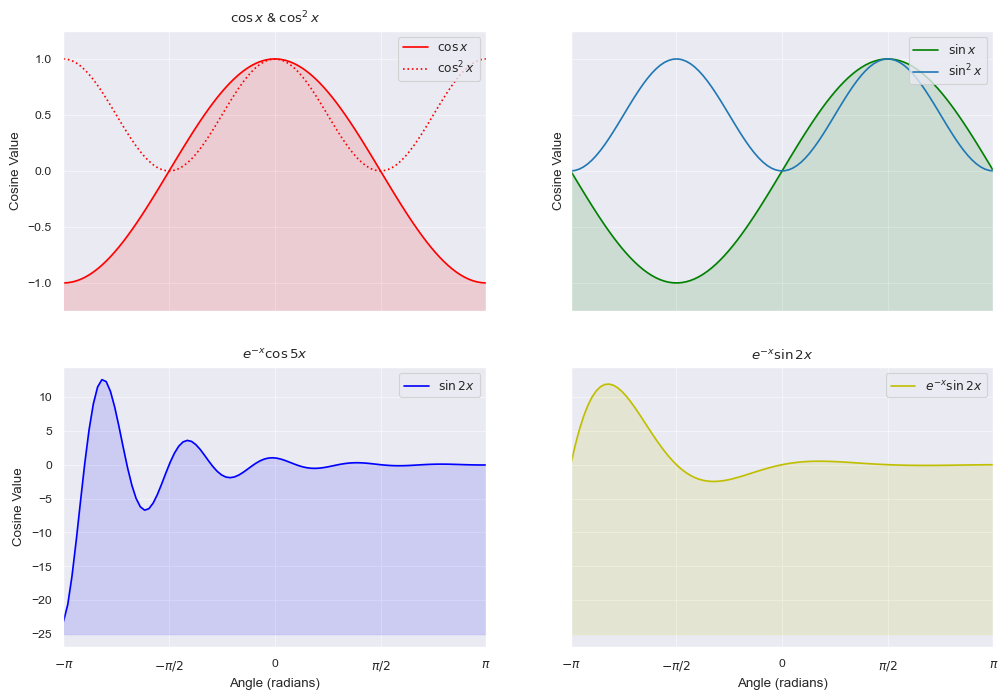

In [199]:
#--------- Generate cosine and sine values --------#
x = np.linspace(-np.pi, np.pi, num=100, endpoint=True)
cos_x = np.cos(x)
sin_x = np.sin(x)
fun1_x = np.exp(-x) * np.cos(5 * x)
fun2_x = np.exp(-x) * np.sin(2 * x)

#------- Plot the data -------#
fig, axes = plt.subplots(nrows=2, ncols=2,
                         figsize=(12, 8),  sharey='row')

#------- Subplot 1 -------#
axes[0, 0].plot(x, cos_x, color='r', label=r'$\cos x$')
axes[0, 0].plot(x, cos_x**2, color='r',
                linestyle=':', label=r'$\cos^2 x$')
axes[0, 0].set_title(r'$\cos x$ & $\cos^2x$')
axes[0, 0].set_ylabel('Cosine Value')
axes[0, 0].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[0, 0].set_xticklabels([])
axes[0, 0].fill_between(x, cos_x, -2, color='r', alpha=.125)
axes[0, 0].margins(x=0, y=0)
axes[0, 0].legend(loc='upper right')

#------- Subplot 2 -------#
axes[0, 1].plot(x, sin_x, color='g', label=r'$\sin x$')
axes[0, 1].fill_between(x, sin_x, -2, color='g', alpha=.125)
axes[0, 1].plot(x, sin_x**2, label=r'$\sin^2 x$')
axes[0, 1].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[0, 1].set_xticklabels([])
axes[0, 1].set_ylabel('Cosine Value')
axes[0, 1].set_ylim(-1.25, 1.25)
axes[0, 1].margins(x=0, y=0)
axes[0, 1].legend(loc='upper right')

#------- Subplot 3 -------#
axes[1, 0].plot(x, fun1_x, color='b', label=r'$\sin 2x$')
axes[1, 0].fill_between(x, fun1_x, -25, color='b', alpha=.125)
axes[1, 0].set_title(r'$e^{-x}\cos 5x$')
axes[1, 0].set_xlabel('Angle (radians)')
axes[1, 0].set_ylabel('Cosine Value')
axes[1, 0].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
axes[1, 0].margins(x=0)
axes[1, 0].legend(loc='upper right')

#------- Subplot 4 -------#
axes[1, 1].plot(x, fun2_x, color='y', label=r'$e^{-x}\sin 2x$')
axes[1, 1].set_title(r'$e^{-x}\sin 2x$')
axes[1, 1].fill_between(x, fun2_x, -25, color='y', alpha=.125)
axes[1, 1].set_xlabel('Angle (radians)')
axes[1, 1].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 1].set_xticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
axes[1, 1].margins(x=0)
axes[1, 1].legend(loc='upper right')

# 'flatten', 'opens' the 2D array into a simple 1D array
for a in axes.flatten():
    a.grid(alpha=.5)

# plt.tight_layout()
plt.show(block=False)

# Optional Exercise: Spectrometer

In [200]:
import pandas as pd
import seaborn as sns

In [201]:
df_nw012_before = pd.read_csv("NW012_before_cleaned.csv", sep=" ")
df_nw012_after = pd.read_csv("NW012_after_cleaned.csv", sep=" ")

In [202]:
df_nw012_before

,Wavelength,Intensity
0,700.006,6901.28000
1,699.962,6675.79000
2,699.918,6797.24000
3,699.874,6718.29000
4,699.830,6661.61000
...,...,...
8467,300.170,30.86540
8468,300.121,30.85530
8469,300.072,27.85375
8470,300.023,24.85220


In [203]:
df_nw012_after

,Wavelength,Intensity
0,700.006,5514.90000
1,699.962,5645.74000
2,699.918,5566.95000
3,699.874,5396.34000
4,699.830,5543.00000
...,...,...
8467,300.170,20.49965
8468,300.121,22.10530
8469,300.072,20.02705
8470,300.023,17.94880


In [204]:
sns.set_context("paper")
sns.set_style("darkgrid")

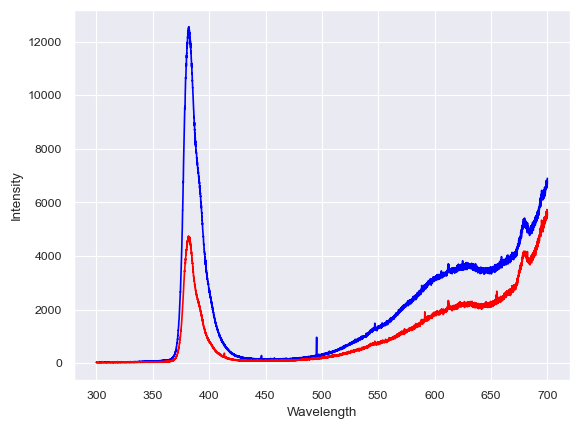

In [205]:
sns.lineplot(data=df_nw012_before, x="Wavelength", y="Intensity", color="blue")
sns.lineplot(data=df_nw012_after, x="Wavelength", y="Intensity", color="red")
plt.show()

In [206]:
before_max = df_nw012_before.loc[df_nw012_before["Intensity"].idxmax()]

In [207]:
before_max_wavelength = before_max["Wavelength"]
before_max_intensity = before_max["Intensity"]

In [208]:
after_max = df_nw012_after.loc[df_nw012_after["Wavelength"] == before_max_wavelength].squeeze()

In [209]:
after_max_wavelength = after_max["Wavelength"]
after_max_intensity = after_max["Intensity"]

In [210]:
scale_factor = before_max_intensity / after_max_intensity

In [211]:
df_nw012_before["Intensity"] /= scale_factor

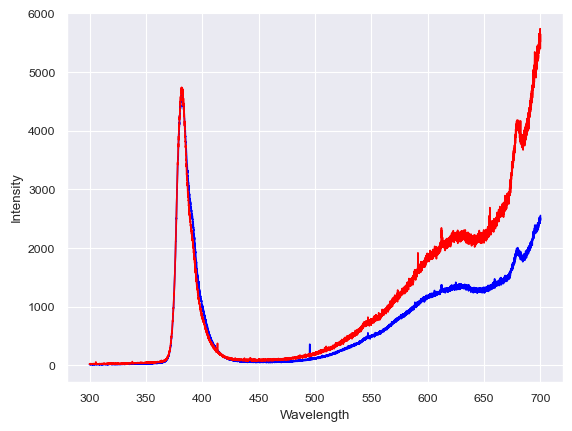

In [212]:
sns.lineplot(data=df_nw012_before, x="Wavelength", y="Intensity", color="blue")
sns.lineplot(data=df_nw012_after, x="Wavelength", y="Intensity", color="red")
plt.show()